## LSTM  (tilt meter )

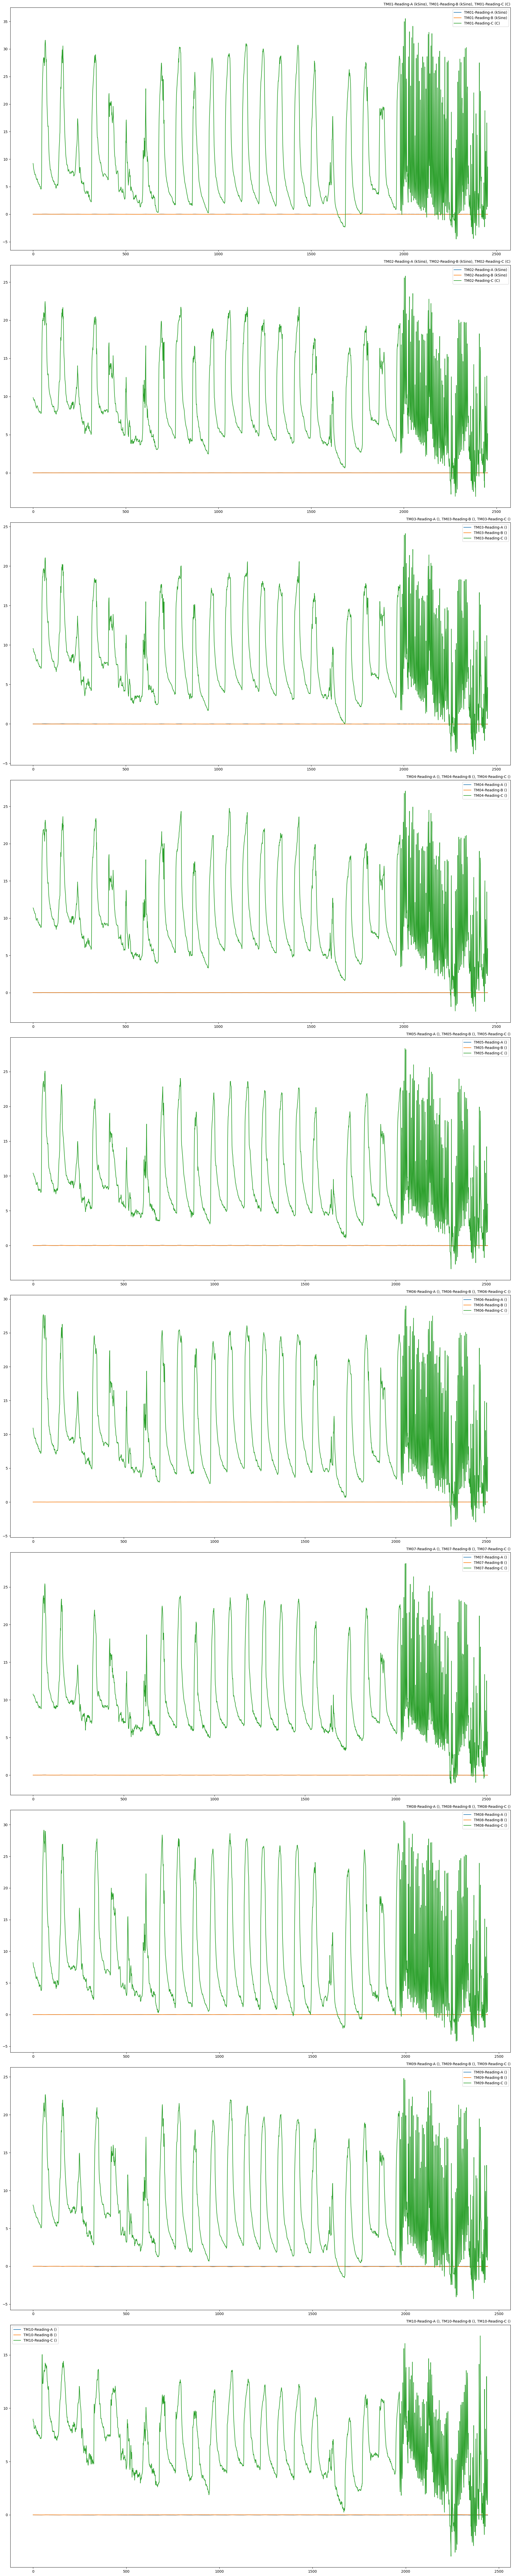

Epoch 1/10
72/72 [==============================] - 4s 13ms/step - loss: 0.1666 - val_loss: 0.1507
Epoch 2/10
72/72 [==============================] - 0s 6ms/step - loss: 0.0529 - val_loss: 0.1220
Epoch 3/10
72/72 [==============================] - 0s 6ms/step - loss: 0.0377 - val_loss: 0.0976
Epoch 4/10
72/72 [==============================] - 0s 7ms/step - loss: 0.0348 - val_loss: 0.0947
Epoch 5/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0305 - val_loss: 0.0906
Epoch 6/10
72/72 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 0.0876
Epoch 7/10
72/72 [==============================] - 0s 6ms/step - loss: 0.0284 - val_loss: 0.0818
Epoch 8/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0288 - val_loss: 0.0804
Epoch 9/10
72/72 [==============================] - 0s 6ms/step - loss: 0.0265 - val_loss: 0.0764
Epoch 10/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0336 - val_loss: 0.0773


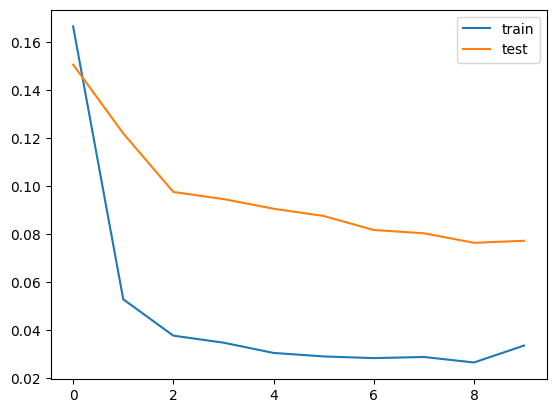

5/5 [==============================] - 0s 5ms/step


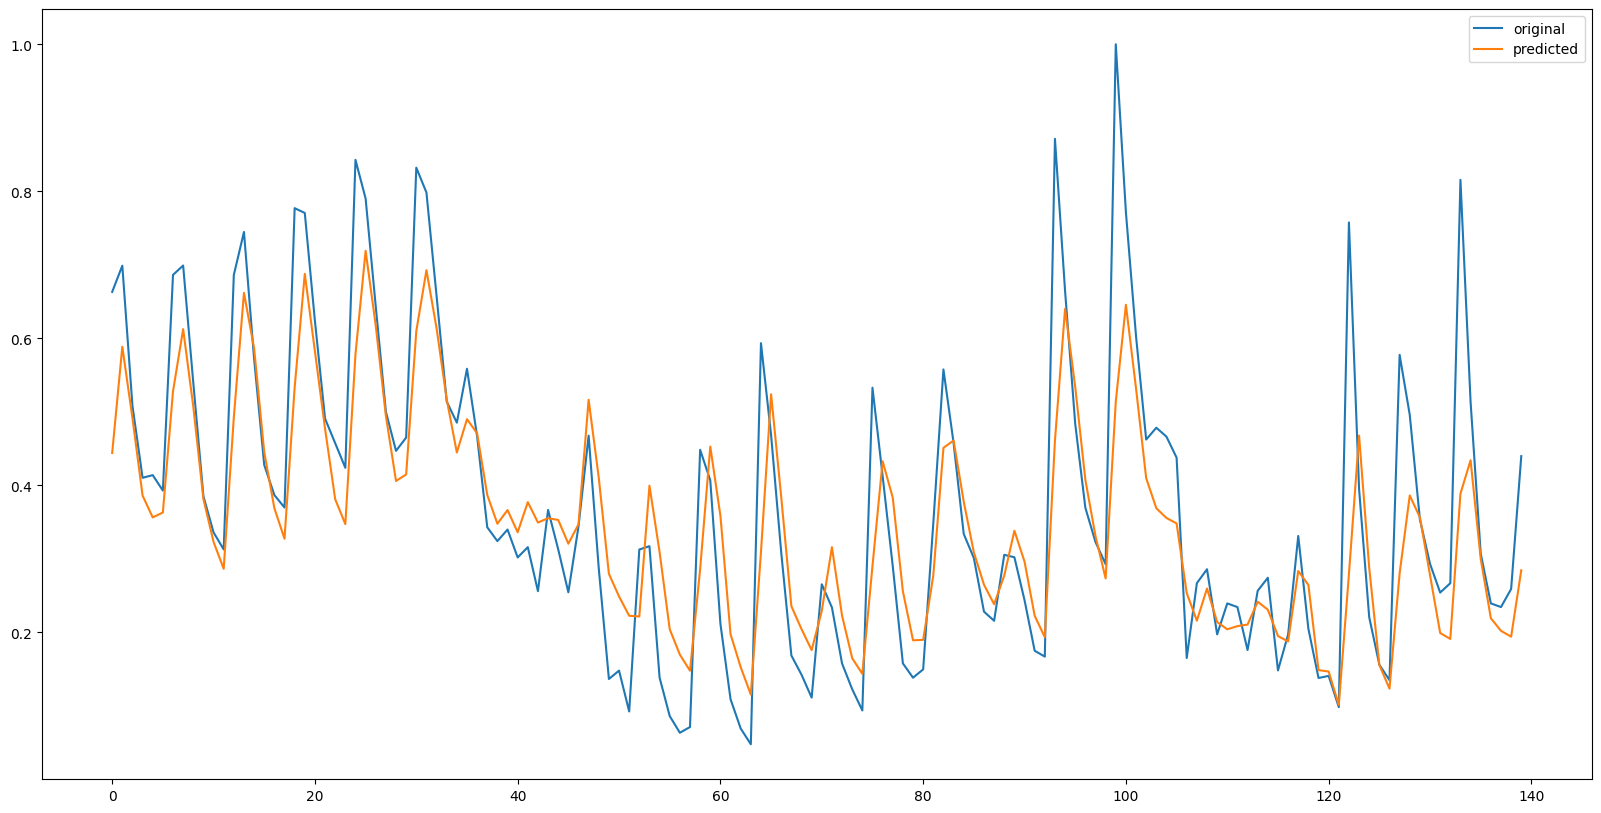

In [21]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

file_path = "/content/TM_combine_data.xlsx"
from pandas import read_excel
from matplotlib import pyplot

dataset = read_excel(file_path, header=0, index_col=0)
values = dataset.values

groups = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

import numpy as np
import matplotlib.pyplot as plt

num_subplots = len(groups) // 3

fig, axs = plt.subplots(num_subplots, 1, figsize=(20, 10*num_subplots))

for i in range(num_subplots):
    start_idx = i * 3
    end_idx = min(start_idx + 3, len(groups))
    group_indices = groups[start_idx:end_idx]

    for j, group in enumerate(group_indices):
        axs[i].plot(values[:, group], label=dataset.columns[group])

    axs[i].set_title(', '.join(dataset.columns[group_indices]), loc='right', fontsize=10)
    axs[i].legend()

plt.tight_layout()
plt.show()
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = concat(cols, axis=1)
	agg.columns = names
	if dropnan:
		agg.dropna(inplace=True)
	return agg
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# split into train and test sets
values = reframed.values
train = values[:2300, :]
test = values[2300:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

yhat = model.predict(test_X)

pyplot.figure(figsize=(20,10))
pyplot.plot(test_y,label="original")
pyplot.plot(yhat,label="predicted")
pyplot.legend()
pyplot.show()


## PROPHET (tilt meter)


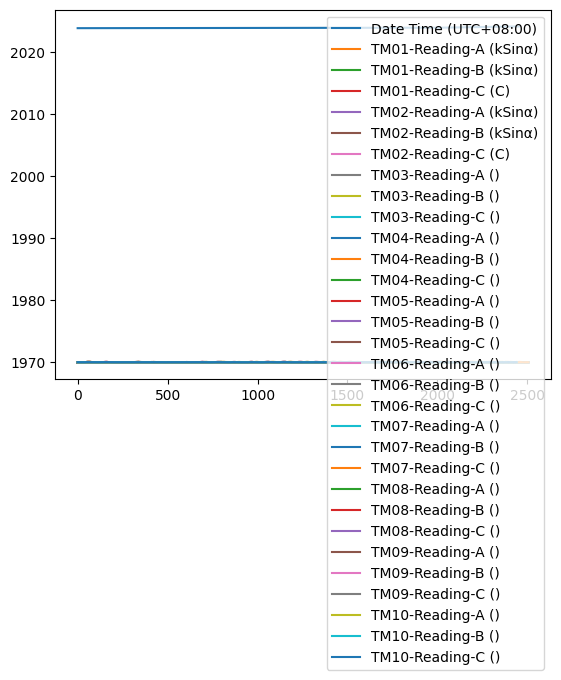

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp128uj8o8/jyyld4nx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp128uj8o8/ilheq7z3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4603', 'data', 'file=/tmp/tmp128uj8o8/jyyld4nx.json', 'init=/tmp/tmp128uj8o8/ilheq7z3.json', 'output', 'file=/tmp/tmp128uj8o8/prophet_modelg182s365/prophet_model-20240717105651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:56:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


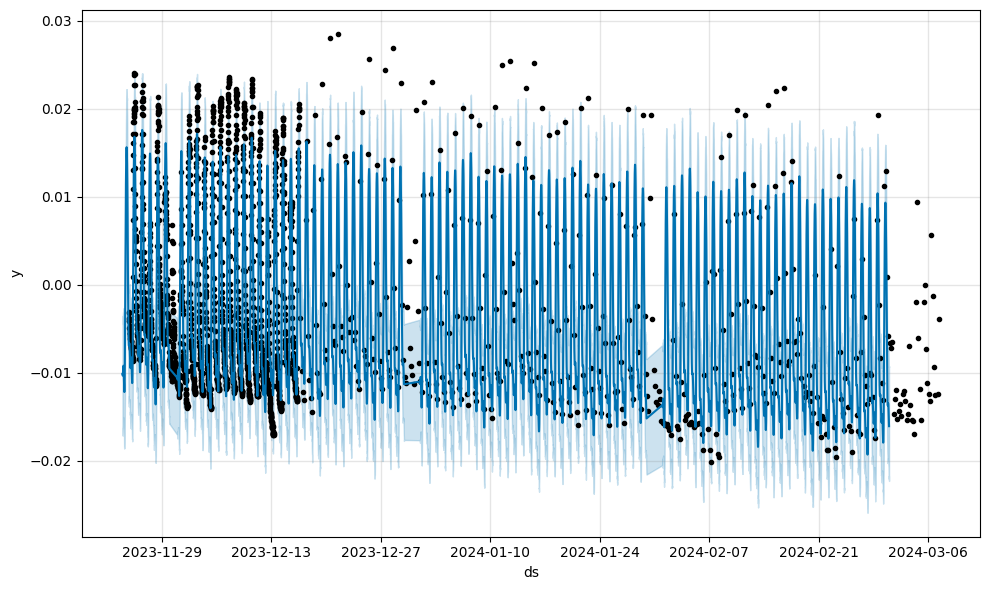

In [22]:
from pandas import read_excel
import pandas as pd
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from pandas import read_csv
from matplotlib import pyplot
path = '/content/TM_combine_data.xlsx'
df = pd.read_excel(path, header=0)
df.plot()
pyplot.show()
columns_to_keep = ['Date Time (UTC+08:00)', 'TM01-Reading-A (kSinα)']
from pandas import read_csv
from pandas import to_datetime
df = df[columns_to_keep].copy()
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
from pandas import DataFrame, to_datetime

future = []
for year in range(2023, 2024):
    for month in range(11, 12):
        for day in range(24, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2023, 2024):
    for month in range(12, 13):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2024, 2025):
    for month in range(1,3):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

future_df = DataFrame(future, columns=['ds'])
future_df['ds'] = to_datetime(future_df['ds'], format='%d-%m-%Y %H:%M')

#print(future_df)
model = Prophet()
model.fit(df)
forecast = model.predict(future_df)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
pyplot.show()

## LSTM (crack meter )

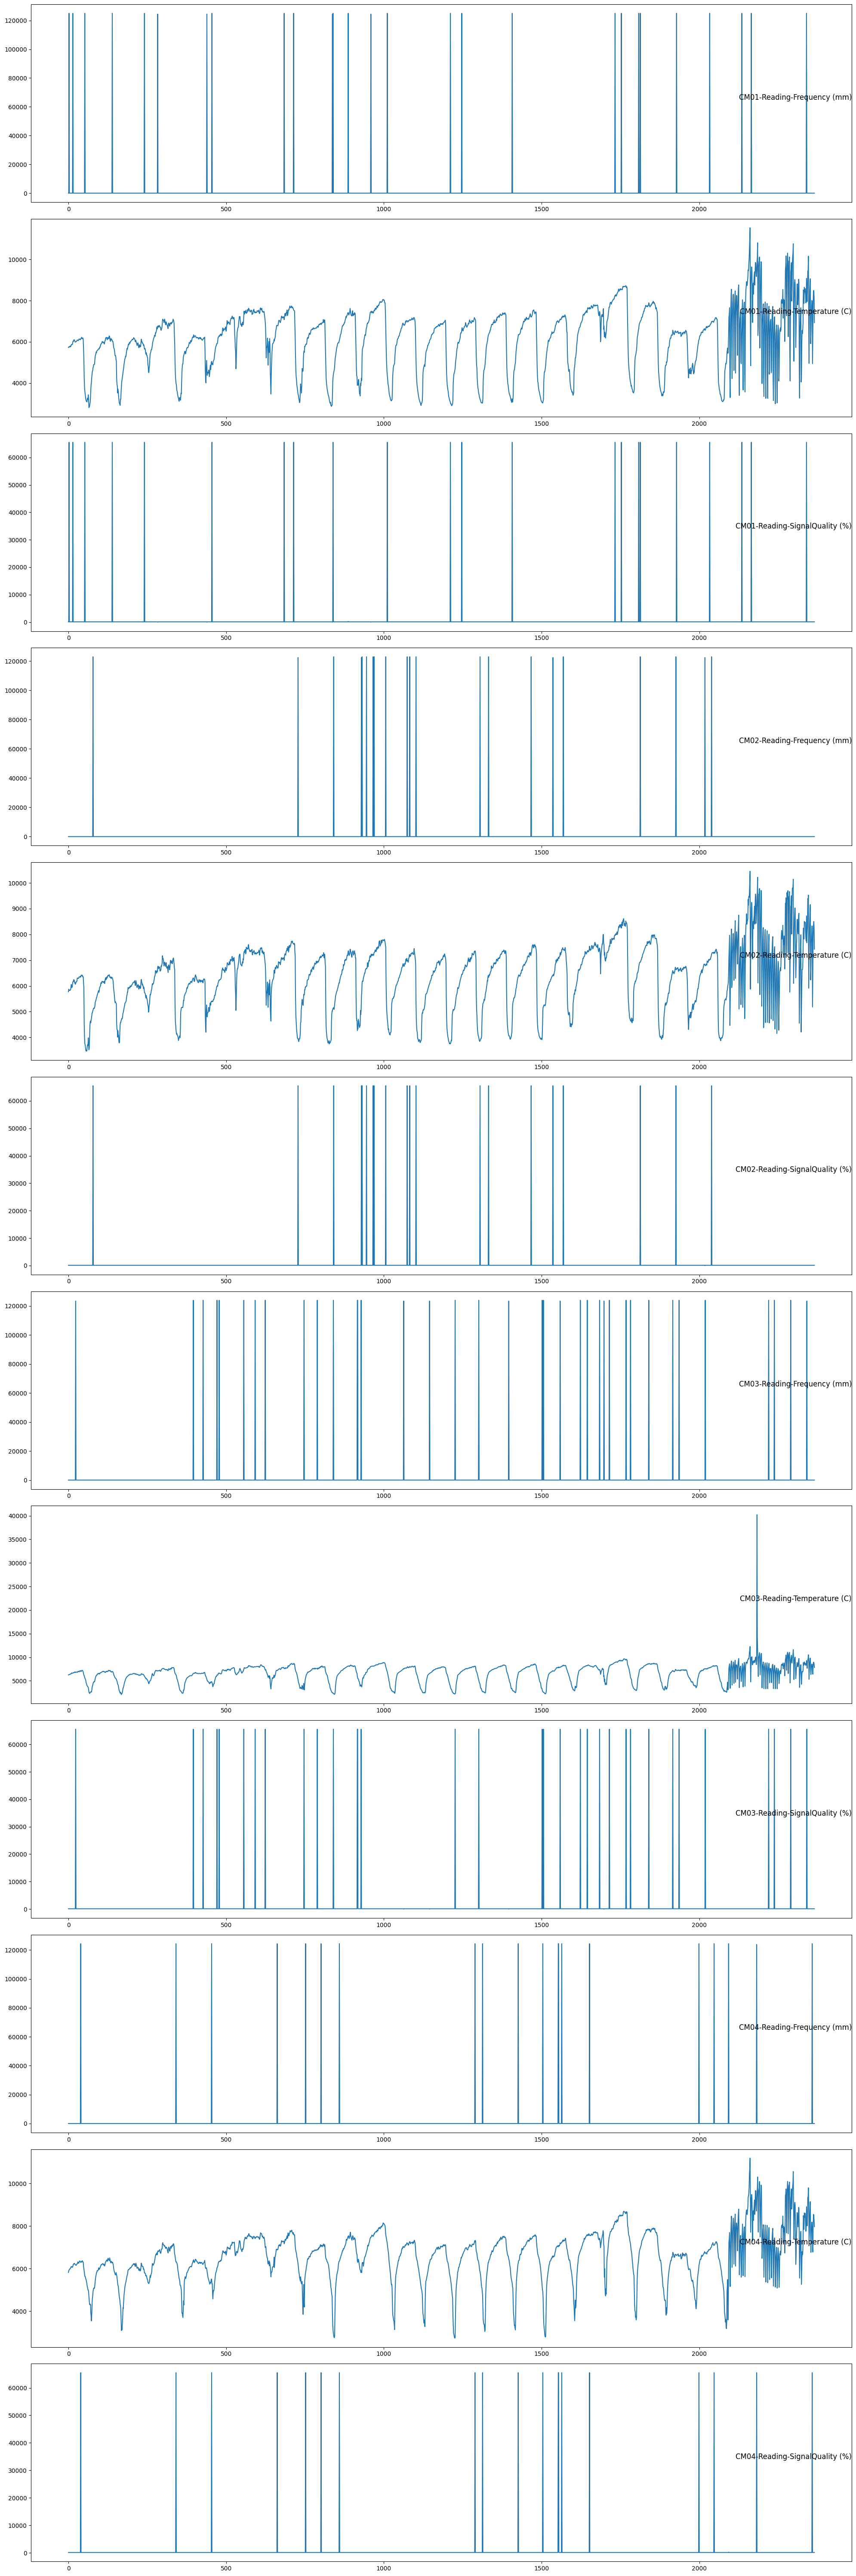

Epoch 1/10
72/72 [==============================] - 3s 12ms/step - loss: 0.0129 - val_loss: 0.0184
Epoch 2/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0159
Epoch 3/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0149
Epoch 4/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.0136
Epoch 5/10
72/72 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0127
Epoch 6/10
72/72 [==============================] - 0s 6ms/step - loss: 0.0066 - val_loss: 0.0104
Epoch 7/10
72/72 [==============================] - 1s 10ms/step - loss: 0.0060 - val_loss: 0.0098
Epoch 8/10
72/72 [==============================] - 1s 11ms/step - loss: 0.0053 - val_loss: 0.0073
Epoch 9/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0043 - val_loss: 0.0059
Epoch 10/10
72/72 [==============================] - 1s 11ms/step - loss: 0.0037 - val_loss: 0.0033


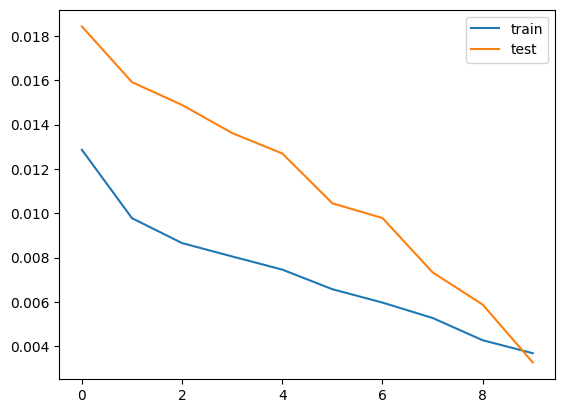

In [23]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

file_path = "/content/CM_Combine_Data.xlsx"
from pandas import read_excel
from matplotlib import pyplot

dataset = read_excel(file_path, header=0, index_col=0)
values = dataset.values

groups = [0, 1, 2, 3 , 4 ,5,6, 7, 8, 9, 10, 11]
i = 1

pyplot.figure(figsize=(20,60))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1

pyplot.tight_layout()
pyplot.show()


# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	agg = concat(cols, axis=1)
	agg.columns = names

	if dropnan:
		agg.dropna(inplace=True)
	return agg

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# split into train and test sets
values = reframed.values
train = values[:2300, :]
test = values[2300:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

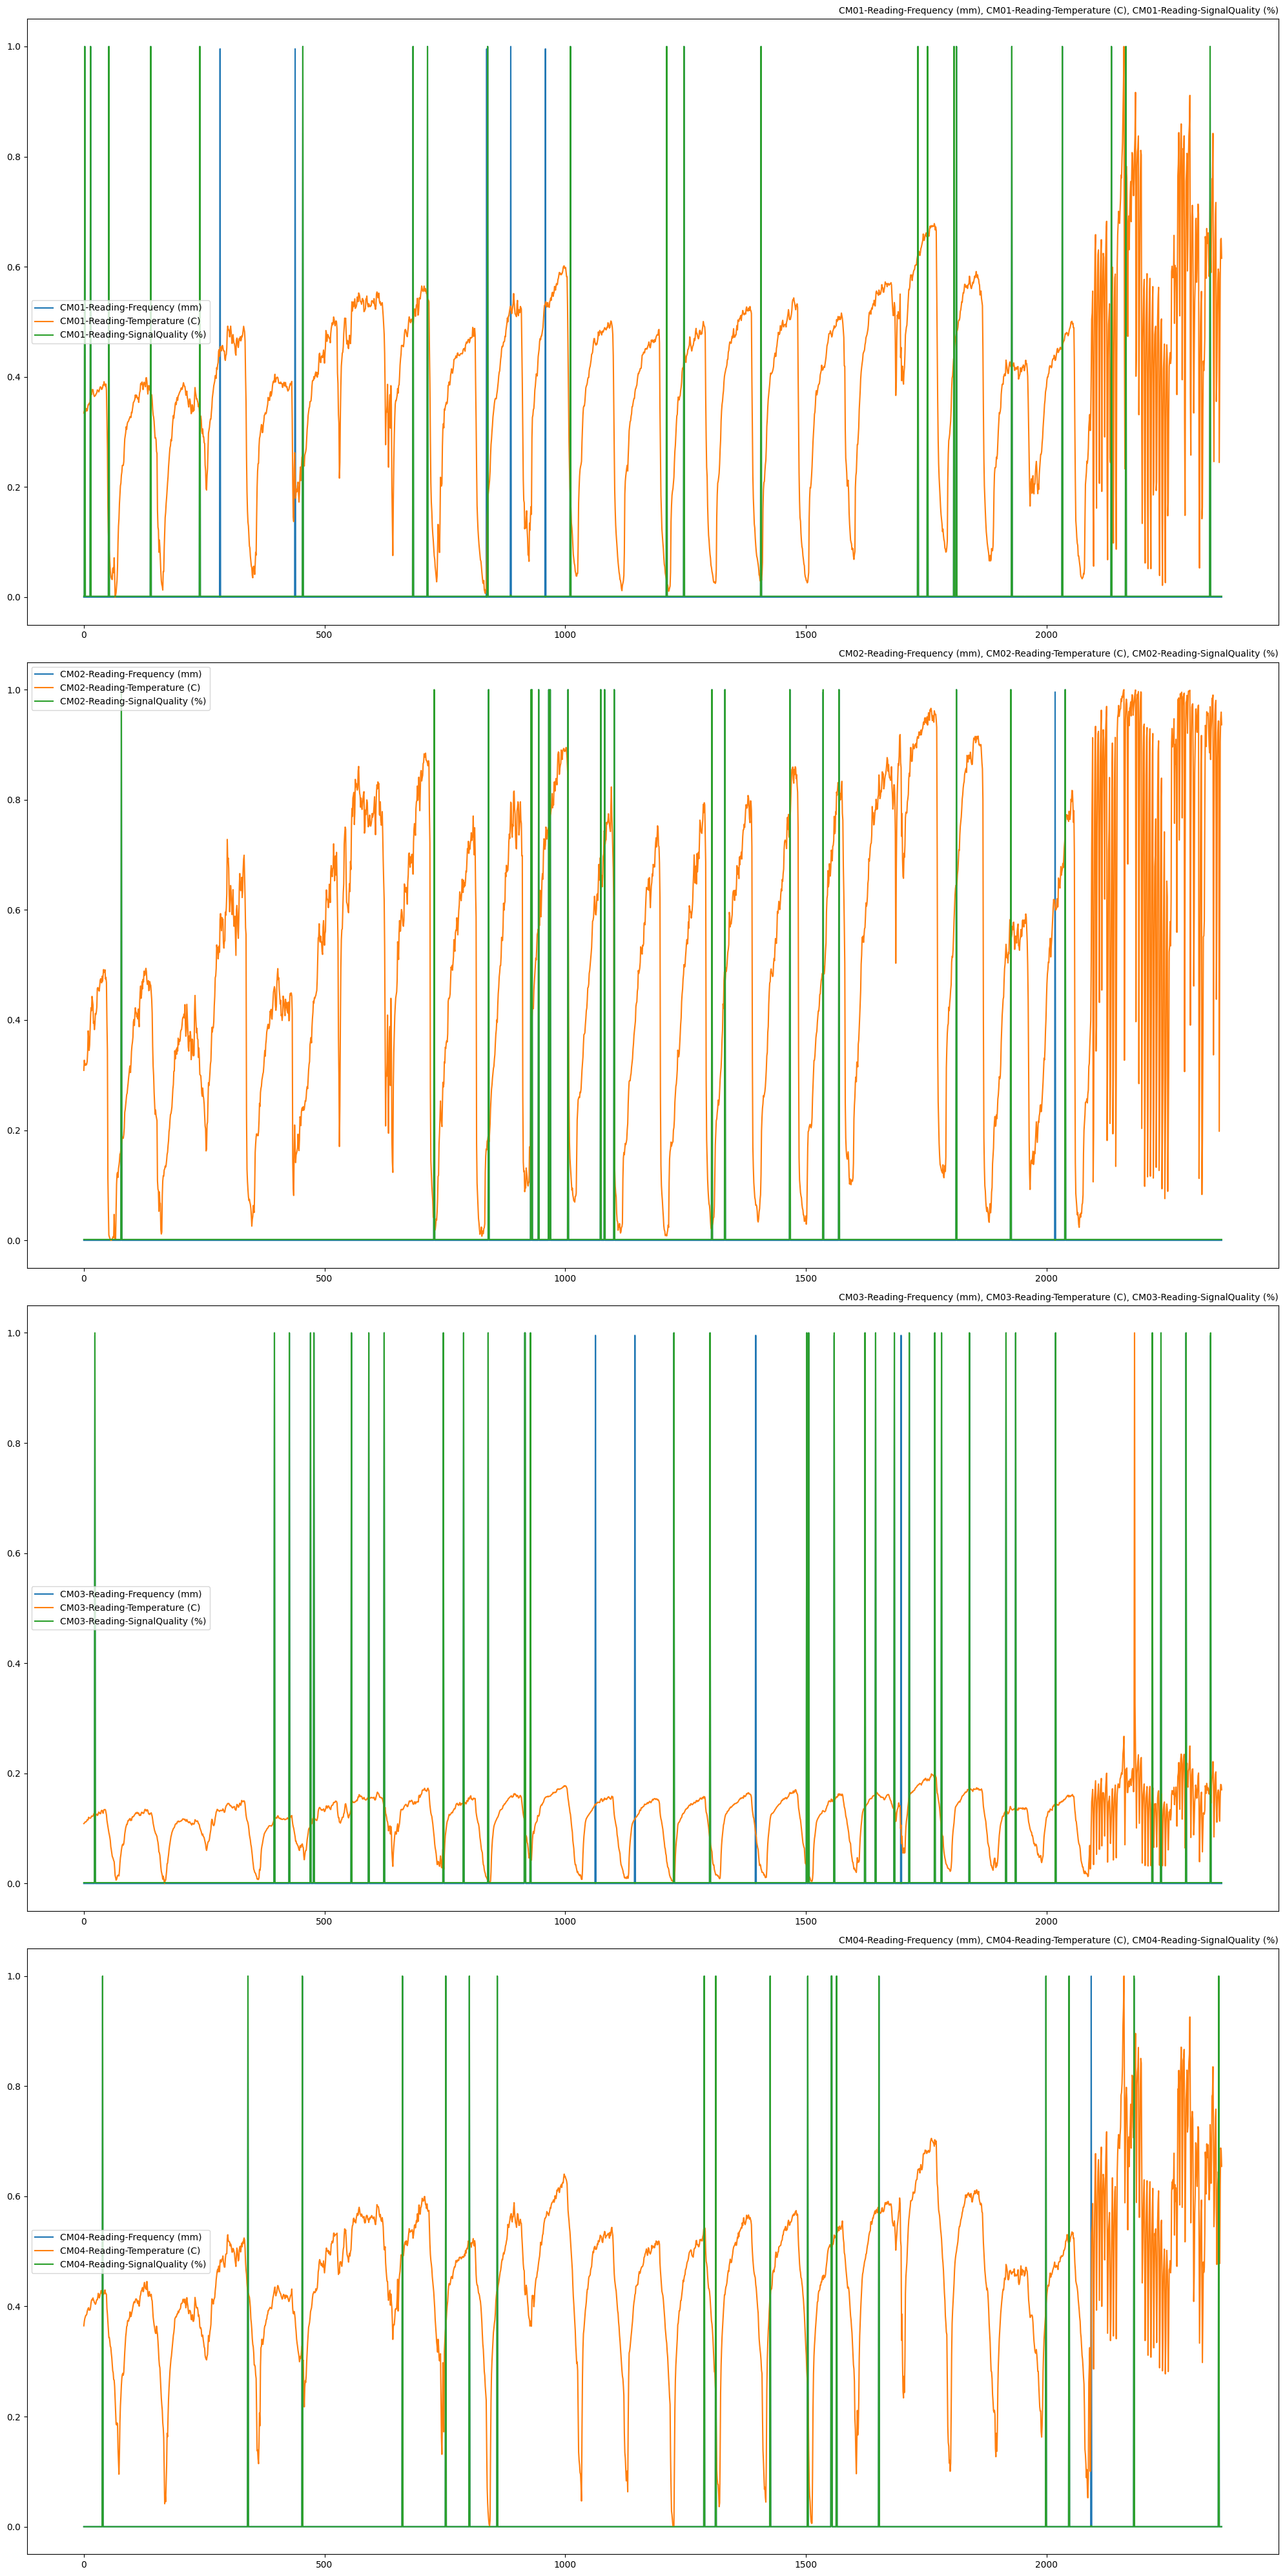

Epoch 1/10
63/63 [==============================] - 3s 13ms/step - loss: 0.0131 - val_loss: 0.0115
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0093 - val_loss: 0.0099
Epoch 3/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0109
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0097
Epoch 5/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0105
Epoch 6/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0108
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0110
Epoch 8/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0079
Epoch 9/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.0074
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0068


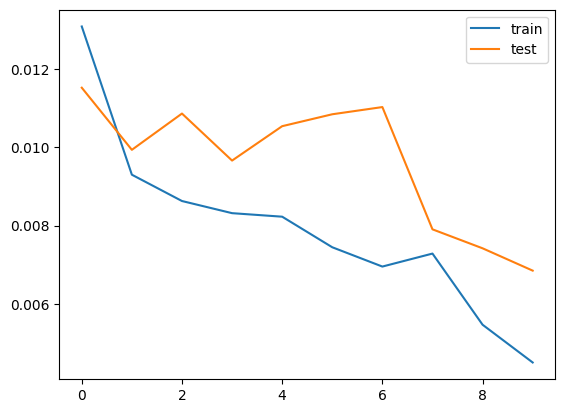

12/12 [==============================] - 0s 3ms/step


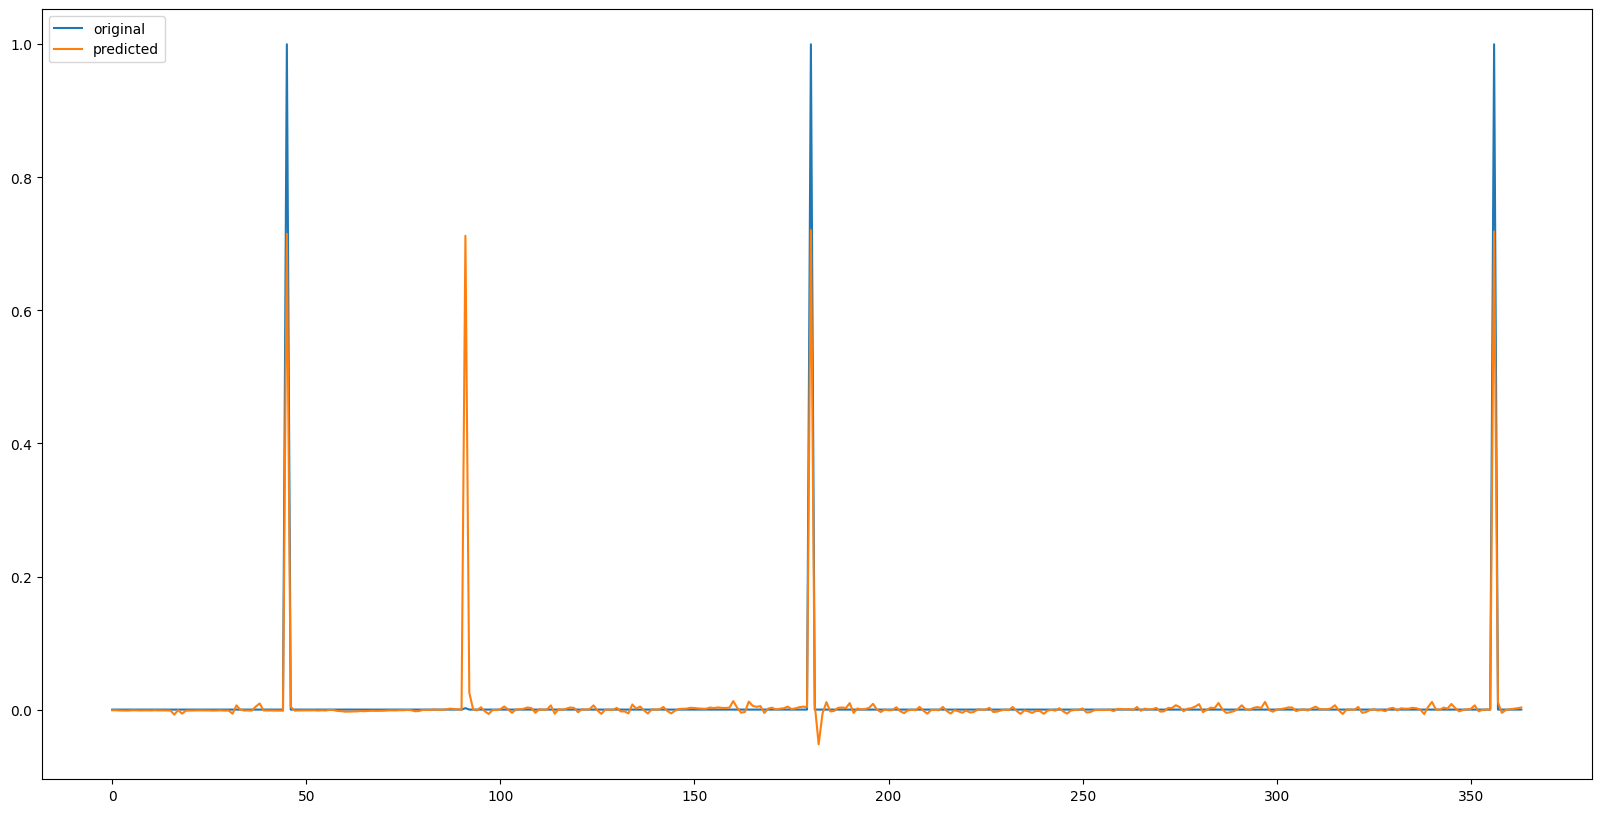

In [24]:
import numpy as np
import matplotlib.pyplot as plt

num_subplots = len(groups) // 3

fig, axs = plt.subplots(num_subplots, 1, figsize=(20, 10*num_subplots))

for i in range(num_subplots):
    start_idx = i * 3
    end_idx = min(start_idx + 3, len(groups))
    group_indices = groups[start_idx:end_idx]

    for j, group in enumerate(group_indices):
        axs[i].plot(values[:, group], label=dataset.columns[group])
    axs[i].set_title(', '.join(dataset.columns[group_indices]), loc='right', fontsize=10)
    axs[i].legend()

plt.tight_layout()
plt.show()

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[1,3,5,7,9,11,13,15,17]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train = values[:2000, :]
test = values[2000:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

yhat = model.predict(test_X)

pyplot.figure(figsize=(20,10))
pyplot.plot(test_y,label="original")
pyplot.plot(yhat,label="predicted")
pyplot.legend()
pyplot.show()

## prophet (crack meter)

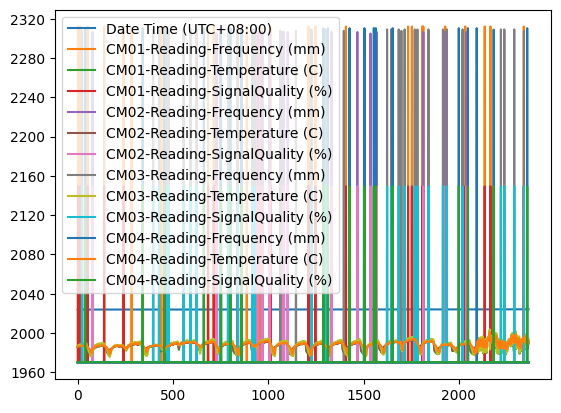

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp128uj8o8/a3wcm2bk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp128uj8o8/kxp_w_oi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91302', 'data', 'file=/tmp/tmp128uj8o8/a3wcm2bk.json', 'init=/tmp/tmp128uj8o8/kxp_w_oi.json', 'output', 'file=/tmp/tmp128uj8o8/prophet_modelvyut2_oc/prophet_model-20240717105717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:57:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


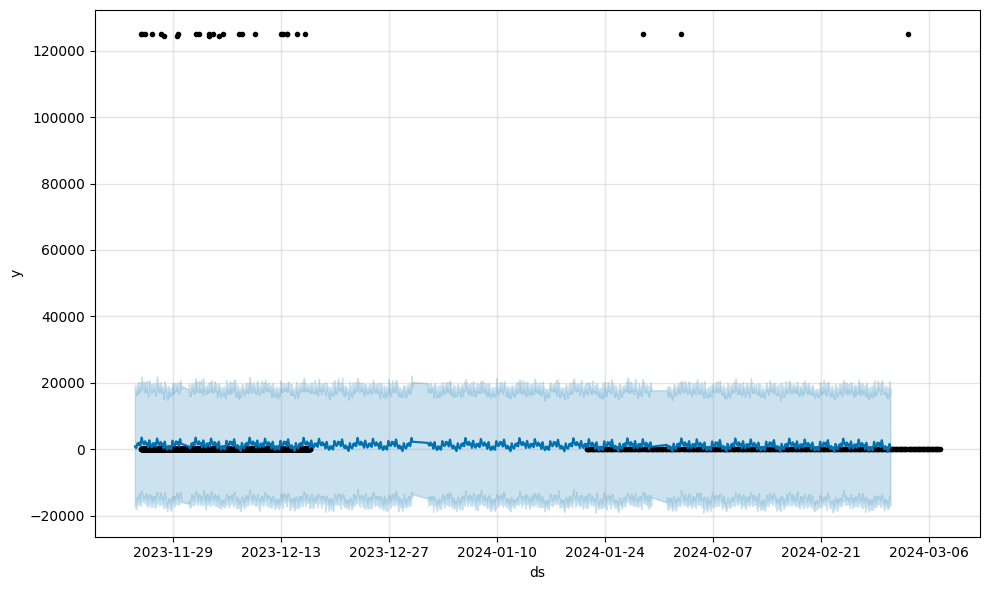

In [25]:
from pandas import read_excel
import pandas as pd
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from pandas import read_csv
from matplotlib import pyplot
path = '/content/CM_Combine_Data.xlsx'
df = pd.read_excel(path, header=0)
df.plot()
pyplot.show()
columns_to_keep = ['Date Time (UTC+08:00)', 'CM01-Reading-Frequency (mm)']
from pandas import read_csv
from pandas import to_datetime
df = df[columns_to_keep].copy()
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
from pandas import DataFrame, to_datetime

future = []
for year in range(2023, 2024):
    for month in range(11, 12):
        for day in range(24, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2023, 2024):
    for month in range(12, 13):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2024, 2025):
    for month in range(1,3):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

future_df = DataFrame(future, columns=['ds'])
future_df['ds'] = to_datetime(future_df['ds'], format='%d-%m-%Y %H:%M')

#print(future_df)
model = Prophet()
model.fit(df)
forecast = model.predict(future_df)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
pyplot.show()